# Análisis Exploratorio de Datos (EDA) 
### Dair Emotion
El conjunto de datos DAIR AI Emotion fue obtenido del repositorio oficial de Hugging Face. Fue desarrollado por DAIR.AI a partir de publicaciones reales de la red social Twitter (actualmente X) y contiene mensajes en inglés etiquetados con seis categorías emocionales: sadness, joy, love, anger, fear y surprise. El dataset está disponible en dos configuraciones (split y unsplit) que difieren en el número total de ejemplos y en la partición de entrenamiento, validación y prueba.


## Traduccion de dataset
Se utilizo la libreria de google llamada deep-translator para traducir el dataset de emociones de ingles a español.

## Dataset y versiones
Para el proyecto se manejaron 2 tipos de versiones del mismo dataset
La primera que contiene la carpeta analisis_sentimiento son los datasets originales traducidos
La segunda que contiene la carpeta agent_emotion_predict son los datasets originales traducidos y ademas se le agrega una columna que representa la emocion
que debe tener el modelo ante un texto del usuario y la emocion identificada del texto

## Estructura
### Analisis de sentimiento
Cada campo cuenta con dos campos: "text" ,"label", "emotion"
Donde text representa el tweet y label la emocion es un entero entre 0 y 5 
Etiqueta de emoción con valores: tristeza (0), felicidad (1), amor (2), ira (3), miedo (4), sorpresa (5) 
Emotion: Representa la emocion
### Agent_emotion_predict
Cada campo cuenta con dos campos: "text" ,"label", "emotion"
Donde text representa el tweet y label la emocion es un entero entre 0 y 5 
Etiqueta de emoción con valores: tristeza (0), felicidad (1), amor (2), ira (3), miedo (4), sorpresa (5) 
Emotion: Representa la emocion
Label_agent: Numero entero que puede ser 1 (felicidad) o 2 (amor) que representa la emocion que debe tener el agente ante un texto y la emocion del texto

In [ ]:
rutas_csv = {
    "dataset_agent_emotion":{
        "train": "data/agent_emotion_predict/emotion_dataset_train_es_v2.csv",
        "validation": "data/agent_emotion_predict/emotion_dataset_validation_es_v2.csv",
        "test": "data/agent_emotion_predict/emotion_dataset_test_es_v2.csv"
    },
    "dataset_text_emotion":{
        "train": "data/analisis_sentimiento/emotion_dataset_train_es.csv",
        "validation": "data/analisis_sentimiento/emotion_dataset_validation_es.csv",
        "test": "data/analisis_sentimiento/emotion_dataset_test_es.csv"
    }
}

## Dataset Text Emotion

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#TRAIN
df_train_emotion = pd.read_csv(rutas_csv['dataset_text_emotion']['train'])
print(df_train_emotion.head())
print(df_train_emotion.describe())
print(df_train_emotion.info())
print(f"Suma de valores nulos: {df_train_emotion.isnull().sum()}")

                                                text  label   emotion
0                No me siento muy interesado en eso.      1   alegria
1                                me siento humillado      0  tristeza
2  Me siento rebelde hoy, así que dejaré esto com...      3       ira
3  Quería hacerlo sentir especial en su cumpleaño...      1   alegria
4  He sostenido desde el principio que siento que...      1   alegria
              label
count  16000.000000
mean       1.565937
std        1.501430
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        5.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   label    16000 non-null  int64 
 2   emotion  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB
None
Suma de valores nulos: text       0
label      0
e

<Axes: xlabel='emotion', ylabel='Count'>

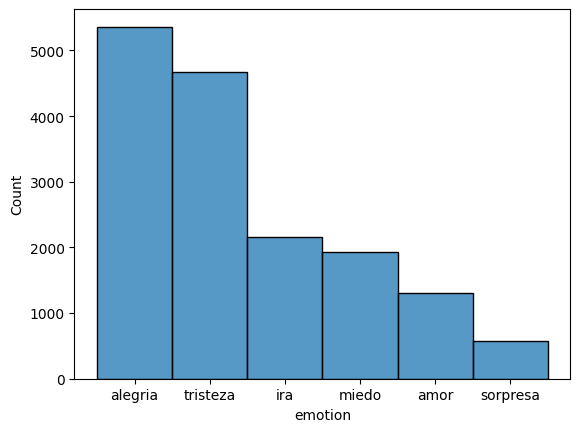

In [ ]:
sns.histplot(df_train_emotion['emotion'])

<Axes: xlabel='text', ylabel='Count'>

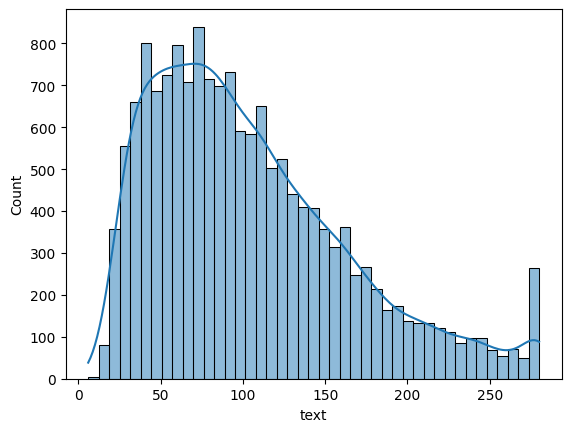

In [22]:
sns.histplot(df_train_emotion['text'].str.len(),kde=True)

<Axes: xlabel='emotion', ylabel='text'>

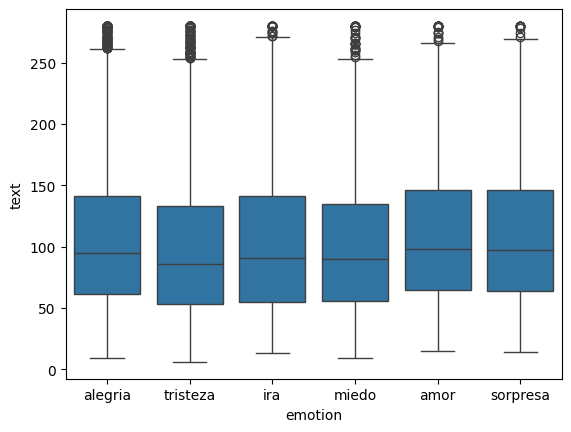

In [23]:
sns.boxplot(data=df_train_emotion,x="emotion",y=df_train_emotion['text'].str.len())

In [26]:
#Conocer Umbral utilizado por el boxplot
Q1 = df_train_emotion['text'].str.len().quantile(0.25)
Q3 = df_train_emotion['text'].str.len().quantile(0.75)
IQR = Q3 - Q1

umbral = Q3 + 1.5 * IQR
outliers = df_train_emotion[df_train_emotion['text'].str.len() > umbral]
print("Outliers:")
outliers.groupby("emotion").size()

Outliers:


emotion
alegria     134
amor         30
ira          53
miedo        40
sorpresa     19
tristeza    109
dtype: int64

In [32]:
#Textos duplicados
print(df_train_emotion["text"].duplicated().sum())
duplicados = df_train_emotion[df_train_emotion["text"].duplicated(keep=False)]
print(duplicados.head(10))
print(duplicados.groupby(["text"])["emotion"].nunique().sort_values(ascending=False).head(10))


54
                                                   text  label   emotion
20    Siento que un recuerdo de lo extraño de justin...      4     miedo
35    Empecé a sentirme aceptado por Gaia en sus pro...      2      amor
50                                   me siento horrible      0  tristeza
115   Tiendo a dejar de respirar cuando me siento es...      3       ira
362   Evito las canciones que hablan sobre cómo me s...      2      amor
786   También lo hice con ambas medidas de azúcar, p...      2      amor
840   Me siento como un artista torturado cuando hab...      3       ira
1041                                     me siento bien      1   alegria
1044                             me siento de mal humor      3       ira
1104                    Me siento tan jodido estos días      3       ira
text
A menudo me siento asaltado por una multitud de impresiones sensoriales.                                                                                                                     

In [ ]:
#VALIDATION
df_val_emotion = pd.read_csv(rutas_csv['dataset_text_emotion']['validation'])
print(df_val_emotion.head())
print(df_val_emotion.describe())
print(df_val_emotion.info())

In [ ]:
#TEST
df_test_emotion = pd.read_csv(rutas_csv['dataset_text_emotion']['validation'])
print(df_test_emotion.head())
print(df_test_emotion.describe())
print(df_test_emotion.info())